# Análise de Exploratória de Dados - Bank Customer Churn Dataset

Neste projeto será realizada o processo de EDA (Exploratory Data Analysis) a partir do dataset Bank Customer Churn Dataset para identificar o perfil dos clientes que deixam o Banco ABC. Os dados podem sem encontrados no [Kaggle](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset) e foram disponibilizados por [Gaurav Topre](https://www.kaggle.com/gauravtopre). 

![img](https://images.unsplash.com/photo-1607944024060-0450380ddd33?q=80&w=1932&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

## 1.1. Os dados, o problema e os objetivos

### O que é Churn?

Churn pode ser traduzido de maneira livre, como a taxa de perda de clientes ao longo do tempo. É uma métrica importante para setores onde a rentabilidade depende da recorrência da compra de produtos ou renovação de serviços, como em imobiliárias focadas em aluguel, planos de assinatura em geral, entre outros. No setor bancário esta perda de clientes pode ser considerada a partir de vários aspectos além do encerramento da conta como:

- Inatividade alongada;
- Redução das atividades;
- Portabilidade do crédito para outros bancos.

Portando é importante entender o que está levando os consumidores a deixar o seu serviço, para corrigir estes pontos e aumentar a retenção. Em um setor com alta concorrência e uma variedade infindável de opções como o bancário, especialmente após a explosão das fintechs, ter este controle e processos de melhoria constante da prestação de serviços é uma das chaves para a longevidade. 

### Estrutura do dataset
Os dados tratam de um banco que presta serviços internacionalmente em países europeus, e tem as seguintes colunas:
|Coluna|Descrição|
|-----|-----|
|**costumer_id**|ID do Cliente|
|**credit_score**|Score de crédito|
|**country**|País onde o cliente reside|
|**gender**|Gênero|
|**age**|Idade|
|**tenure**|Tempo de relacionamento com o banco|
|**balance**|Balanço em conta|
|**products_number**|Número de produtos contratados|
|**credit_card**|Possui cartão de crédito (booleano)|
|**active_member**|Cliente ativo (booleano)|
|**estimated_salary**|Salário estimado|
|**churn**|Churn (booleano)|

### Objetivos
Nosso objetivo nessa análise é buscar o perfil dos clientes do Banco ABC que estão deixando seus serviços bancários. 

## 1.2. Importação das biblitoecas e carregamento dos dados

In [171]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
my_palette = sns.color_palette(["#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF", "#ADE8F4", "#CAF0F8"])
sns.set_palette(my_palette)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

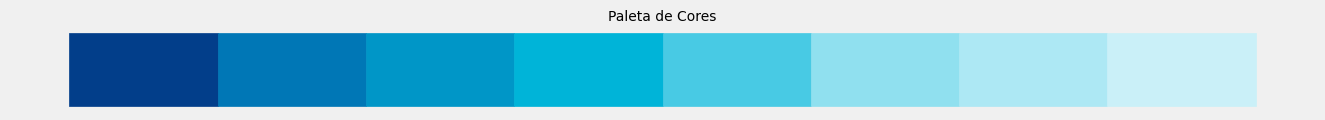

In [172]:
plt.figure(figsize=(11, 1))

for i, cor in enumerate(my_palette):
    plt.fill_between([i, i + 1], 0, 1, color=cor)

plt.axis('off')
plt.title('Paleta de Cores', fontsize = 10)
plt.show()

In [173]:
df = pd.read_csv("../data/raw/data.csv")

# 2. Estrutura dos dados

In [175]:
df.shape

(10000, 12)

In [176]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [177]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Nulos e duplicatas

In [180]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [181]:
df.duplicated().sum()

0

#### Observações

Não temos dados nulos ou duplicados, os tipos de dados nas colunas estão corretos. Não vejo necessidade neste momento para manipulação nos dados.

# 3. Análise Exploratória de Dados

## 3.1. A estatísticas descritivas

In [185]:
df.drop(columns = "customer_id", axis = 1).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


#### Observações

Os únicos pontos onde vemos desequilibrios nos dados são em "balance" e "estimated_salary" o que é natural tratando de dados financeiros, raramente será possível observar locais onde a distribuição de renda é equalitária. Vejo em "estimated_salary" possíves erros de estimação, o que pode tornar essa coluna invalida para análise, tomarei o mesmo procedimento para a coluna de 'active_member' que também não tem critérios esclarecidos.

In [187]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Entre os os países onde o Banco ABC tem agências, o com menor valor de salário mínimo é Espanha com valor de 1.000€ mensais, equivalente a 12.000€ anuais (medida de salário do conjunto de dados). Vamos buscar dados de clientes com salário estimado menor que o espanhol. 

In [189]:
df.query("estimated_salary <= 1000")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
149,15794413,416,France,Male,32,0,0.00,2,0,1,878.87,0
195,15594815,807,France,Male,35,3,174790.15,1,1,1,600.36,0
393,15684548,556,Spain,Male,38,8,0.00,2,0,0,417.41,1
396,15584766,557,France,Male,33,3,54503.55,1,1,1,371.05,0
559,15571816,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,15613048,648,Germany,Female,40,5,139973.65,1,1,1,667.66,1
9647,15679693,625,France,Male,31,5,0.00,2,0,1,90.07,0
9649,15788025,715,France,Female,38,0,0.00,2,1,1,332.81,0
9875,15747130,521,France,Male,39,7,0.00,2,0,1,653.58,0


Como não é possível saber os critérios para a estimação dos salários minha opção será por não usar esta coluna durante esta análise. Podemos ver neste recorte dos dados, por exemplo um caso de cliente que tem 90€ de salário. 

## 3.2. O Perfil dos Clientes

### País 

In [193]:
country = df["country"].value_counts().reset_index()
country["proportion"] = df["country"].value_counts(normalize = True).values
country

,country,count,proportion
0,France,5014,0.5014
1,Germany,2509,0.2509
2,Spain,2477,0.2477


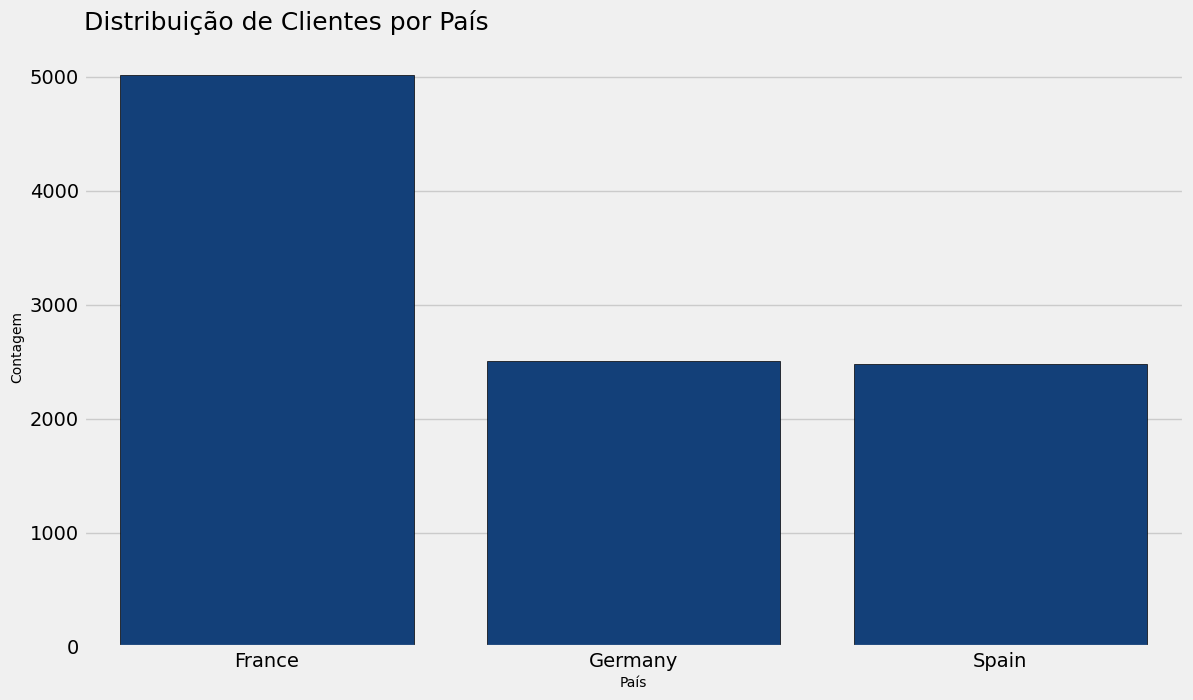

In [347]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(data = country, x = 'country', y = 'count', edgecolor = 'black', linewidth = 0.5)
ax.set_title("Distribuição de Clientes por País", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("País", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

#### Sobre os país de residência

Cerca de 50% dos clientes são residentes da França, o restante esta dividida de forma bastante proporcional entre Alemanha e Espanha. 

### Genêro

In [197]:
gender = df["gender"].value_counts().reset_index()
gender["proportion"] = df["gender"].value_counts(normalize = True).values
gender

,gender,count,proportion
0,Male,5457,0.5457
1,Female,4543,0.4543


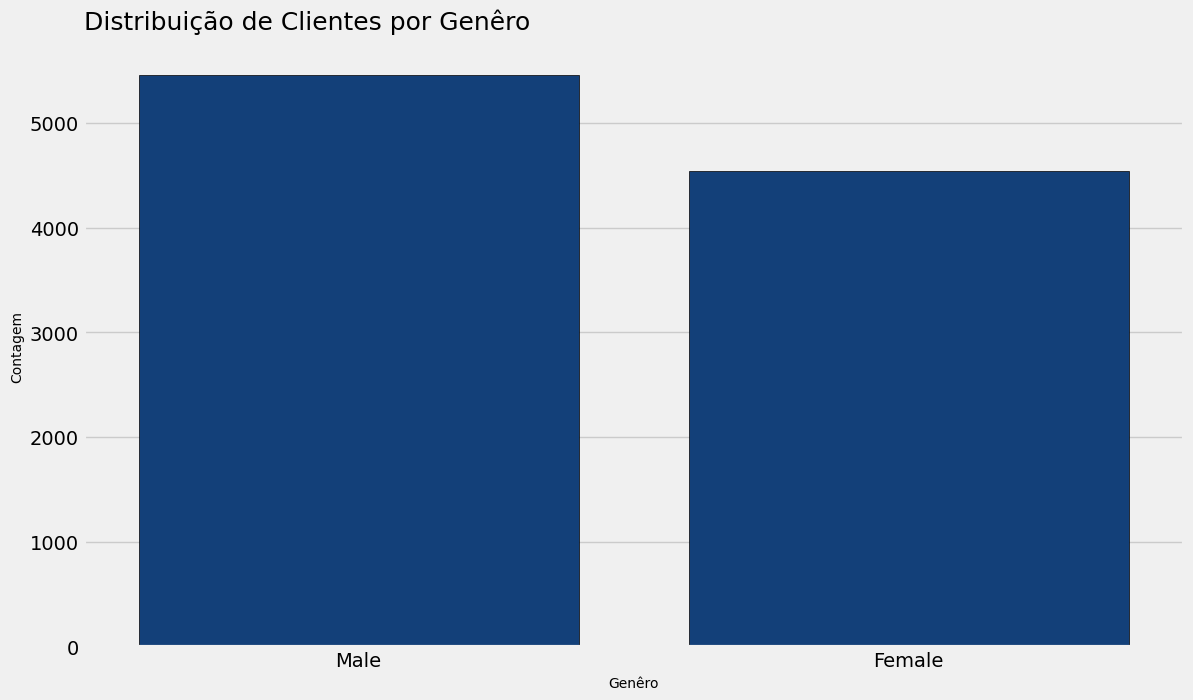

In [345]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(data = gender, x = 'gender', y = 'count', edgecolor = 'black', linewidth = 0.5)
ax.set_title("Distribuição de Clientes por Genêro", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Genêro", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

#### Sobre o genêro 

Existe uma distribuição bastante equilibrada entre clientes homens e mulheres.

### Idade

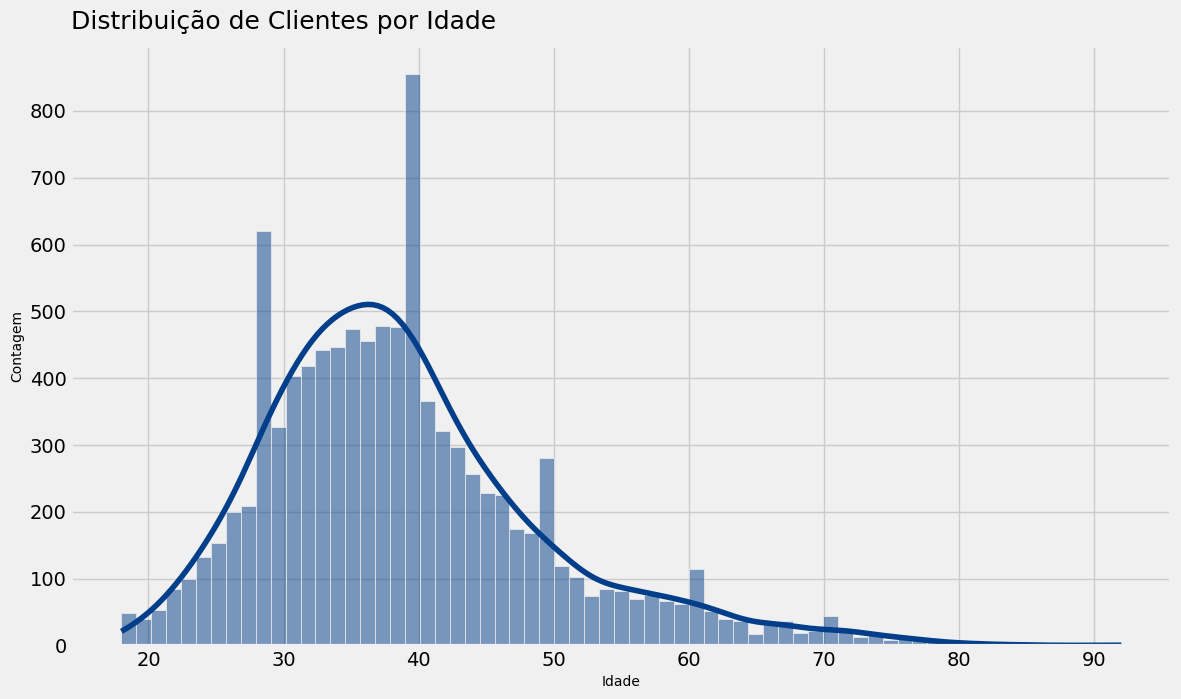

In [343]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(data = df, x = 'age', kde = True)
ax.set_title("Distribuição de Clientes por Idade", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Idade", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

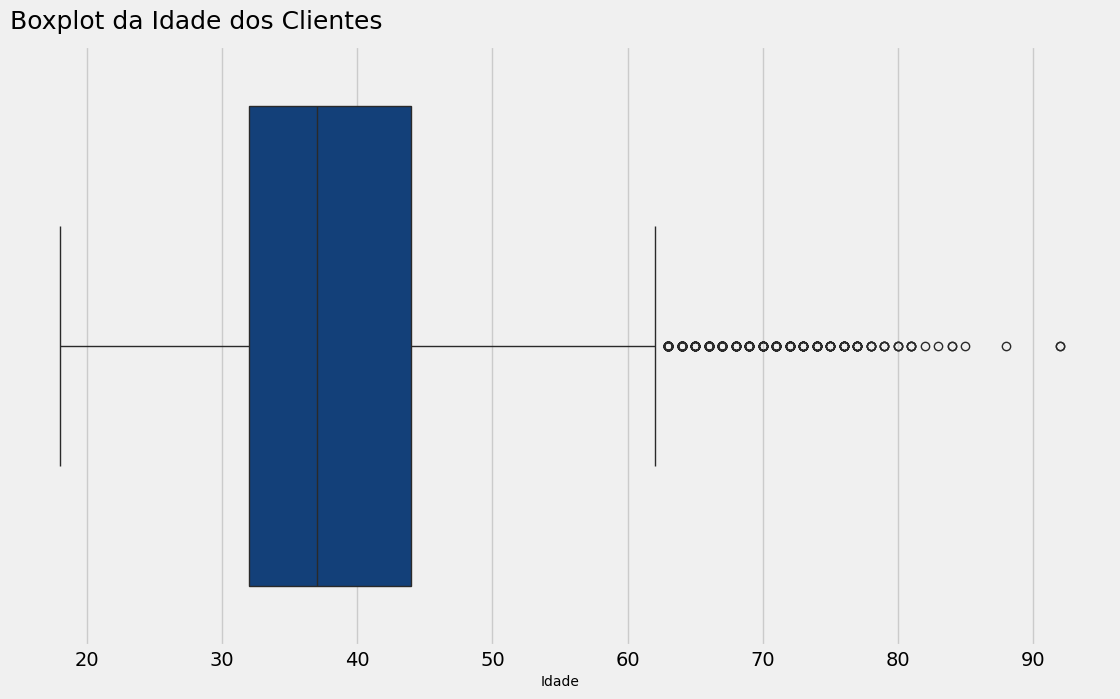

In [341]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data = df, x = 'age')
ax.set_title("Boxplot da Idade dos Clientes", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Idade", fontsize = 10)
plt.show()

#### Sobre a Idade

A maior parcela de clientes do banco está entre seus 30 e 50 anos. Existe uma assimétria a direita na distribuição, causada pela existência de alguns clientes de idade mais avançada na base de dados.

### Score de Crédito

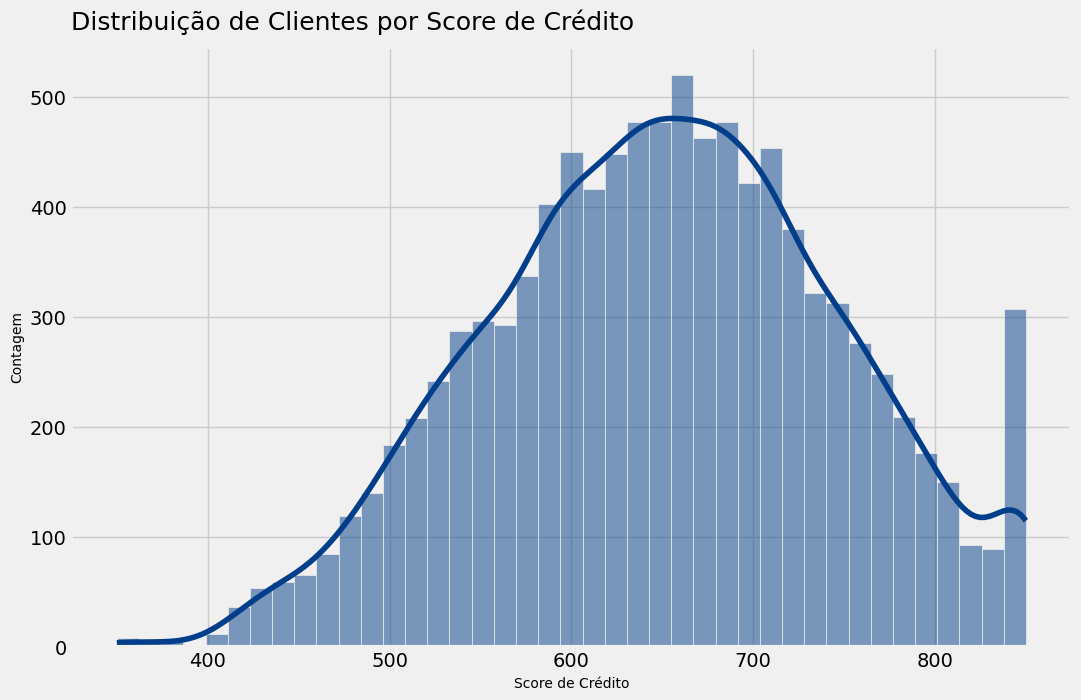

In [205]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(data = df, x = 'credit_score', kde = True)
ax.set_title("Distribuição de Clientes por Score de Crédito", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Score de Crédito", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

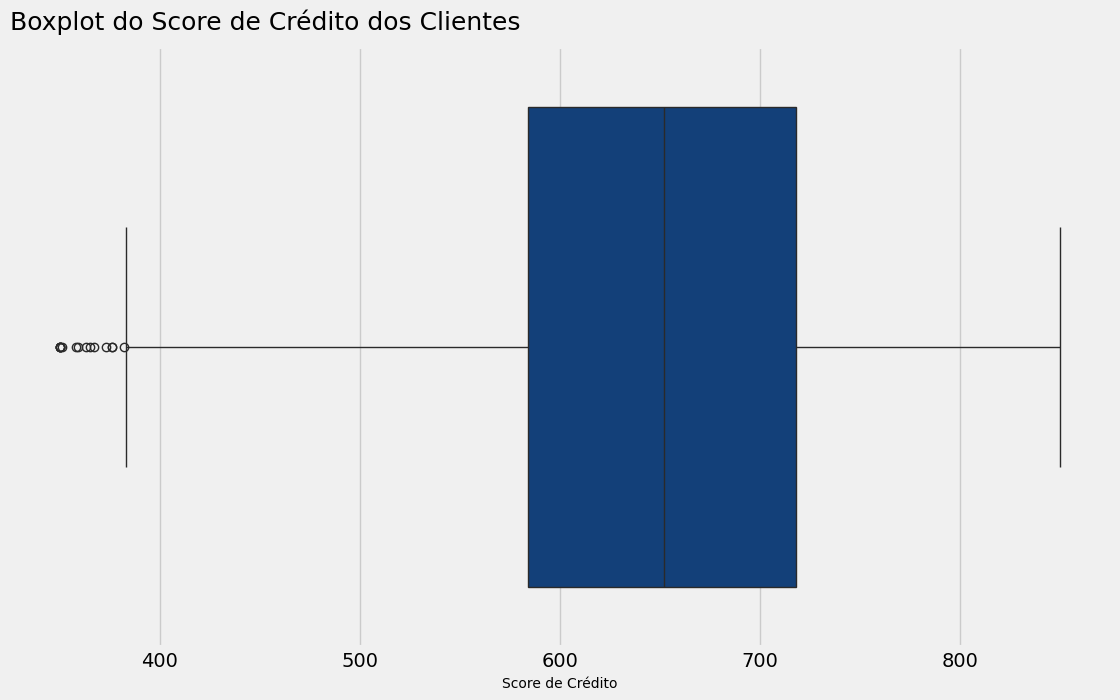

In [339]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data = df, x = 'credit_score')
ax.set_title("Boxplot do Score de Crédito dos Clientes", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Score de Crédito", fontsize = 10)
plt.show()

#### Sobre o Score de Crédito

Maioria dos clientes tem um score de crédito entre 500 e 800 o que mostra uma boa condição para aquisição de produtos bancários. 

### Tempo de Relacionamento

In [209]:
tenure = df['tenure'].value_counts().reset_index()
tenure['proportion'] = df['tenure'].value_counts(normalize = True).values
tenure

,tenure,count,proportion
0,2,1048,0.1048
1,1,1035,0.1035
2,7,1028,0.1028
3,8,1025,0.1025
4,5,1012,0.1012
5,3,1009,0.1009
6,4,989,0.0989
7,9,984,0.0984
8,6,967,0.0967
9,10,490,0.0490


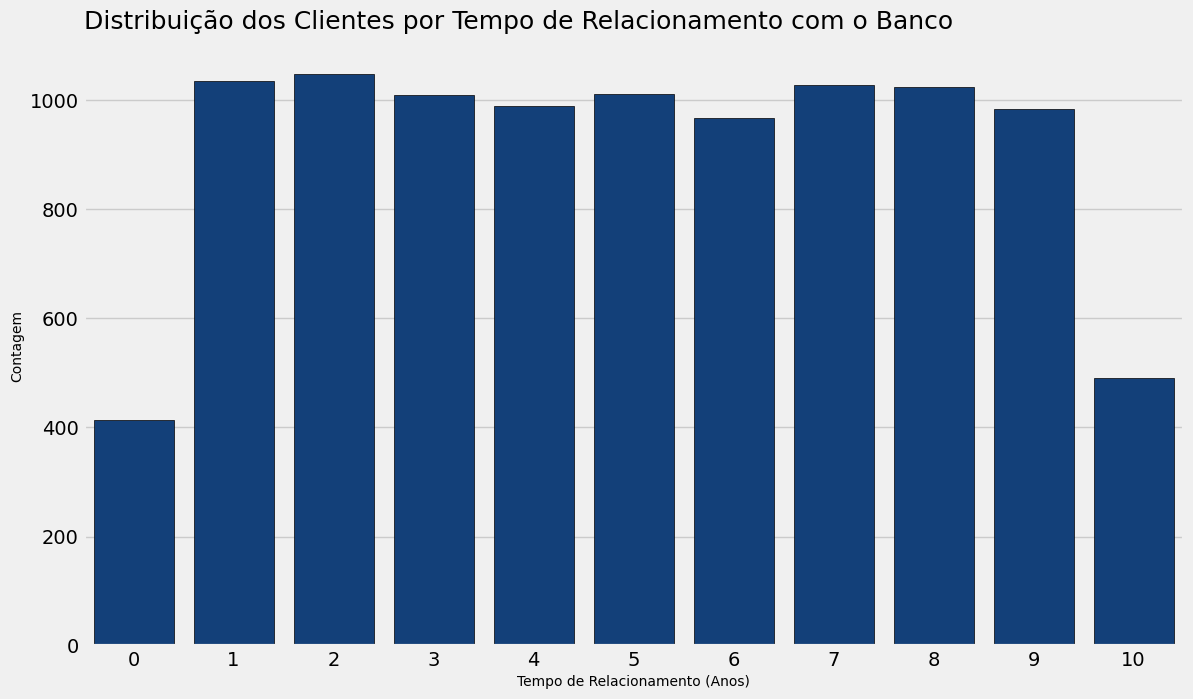

In [337]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(tenure, x = 'tenure', y = 'count', edgecolor = 'black', linewidth = 0.5)
ax.set_title("Distribuição dos Clientes por Tempo de Relacionamento com o Banco", fontsize = 18, pad = 12, loc = "left")
ax.set_xlabel("Tempo de Relacionamento (Anos)", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

### Balanço em Conta

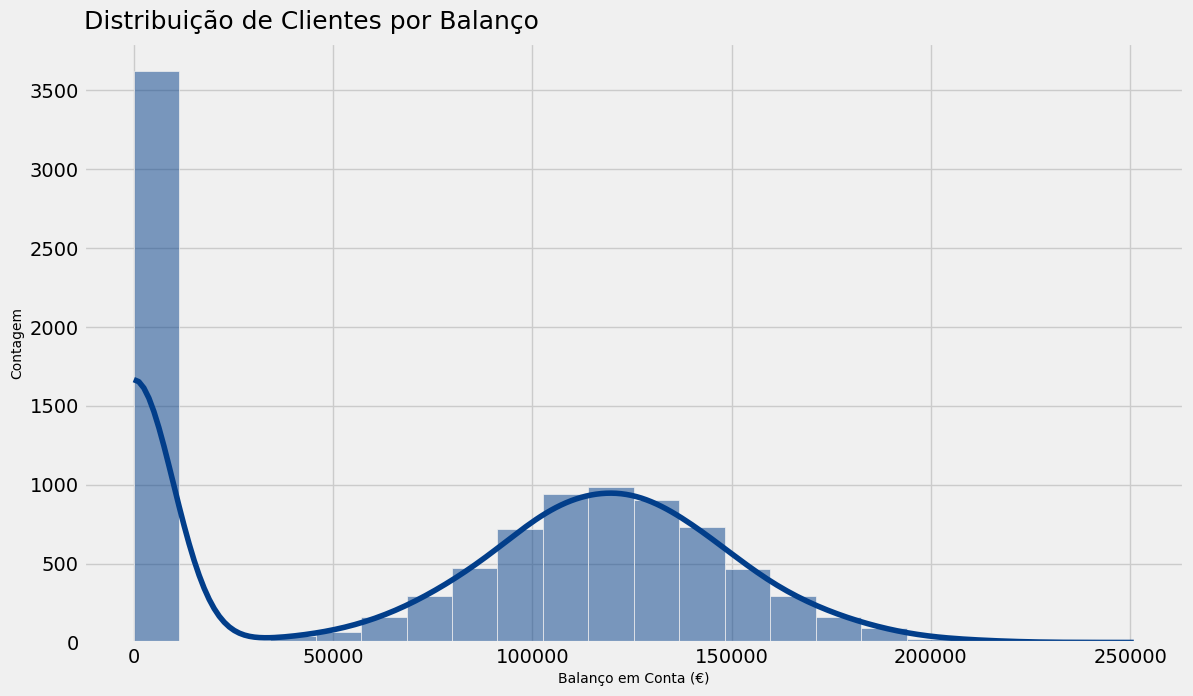

In [335]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(df, x = 'balance', kde = True)
ax.set_title("Distribuição de Clientes por Balanço", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("Balanço em Conta (€)", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

#### Sobre o Balanço em Conta

Existe uma grande quantidade de clientes com balanço zero em conta, vamos isolar estes dados para buscar relações entre o balanço zero e a possibilidade ou não de churn.

In [214]:
balance_zero = df.query("balance == 0").copy()
balance_zero.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0


Vamos observar de maneira isolada somente os clientes com clientes de saldo positivo. 

In [216]:
pos_balance = df.query("balance != 0")
pos_balance.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


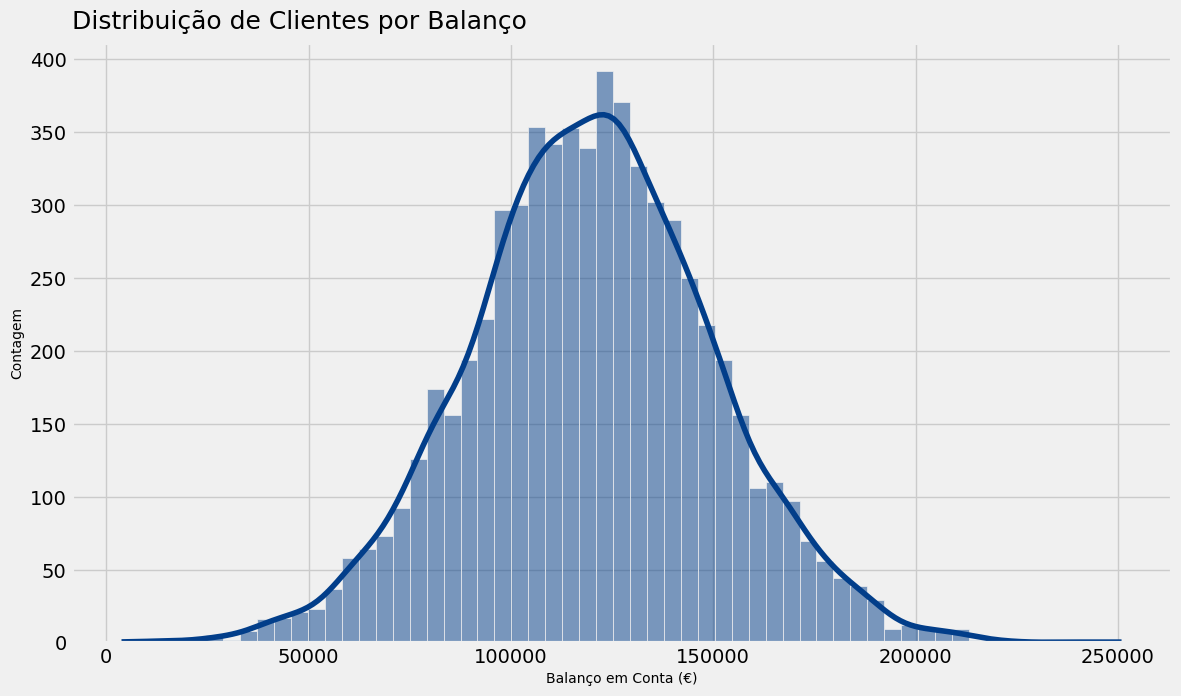

In [333]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(pos_balance, x = 'balance', kde = True)
ax.set_title("Distribuição de Clientes por Balanço", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("Balanço em Conta (€)", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

Estes clientes tem um saldo consideravel em conta, a maioria com balanço entre 80.000 e 160.000. É uma distribuição muito próxima à normal. 

### Produtos Contratados

In [220]:
products = df['products_number'].value_counts().reset_index()
products['proportion'] = df['products_number'].value_counts(normalize = True).values
products

,products_number,count,proportion
0,1,5084,0.5084
1,2,4590,0.4590
2,3,266,0.0266
3,4,60,0.0060


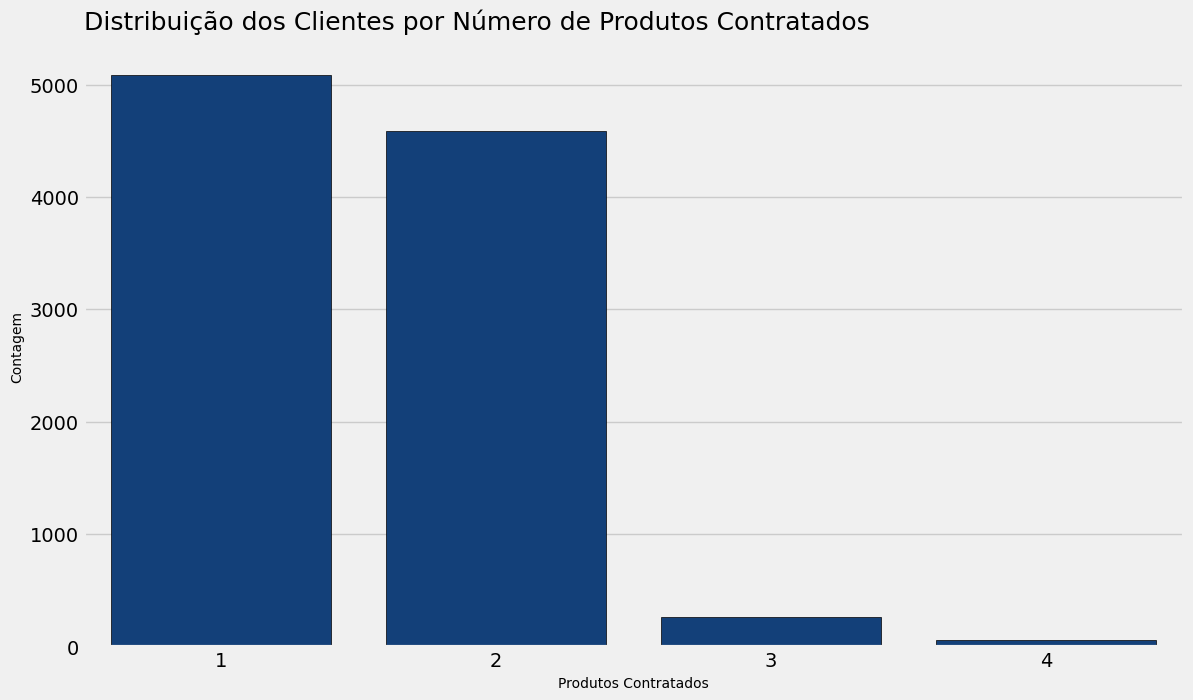

In [331]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(products, x = 'products_number', y = 'count', edgecolor = 'black', linewidth = 0.5)
ax.set_title("Distribuição dos Clientes por Número de Produtos Contratados", fontsize = 18, pad = 12, loc = "left")
ax.set_xlabel("Produtos Contratados", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

#### Sobre os Produtos Contratados

Mais de 90% dos clientes tem somente dois produtos contratados, um deles o cartão de crédito, o qual vamos conferir na próxima etapa. 

### Cartão de Crédito

In [224]:
ccard = df['credit_card'].value_counts().reset_index()
ccard['proportion'] = df['credit_card'].value_counts(normalize = True).values
ccard['credit_card'] = ccard['credit_card'].apply(lambda i: "Yes" if i == 1 else "No")
ccard

,credit_card,count,proportion
0,Yes,7055,0.7055
1,No,2945,0.2945


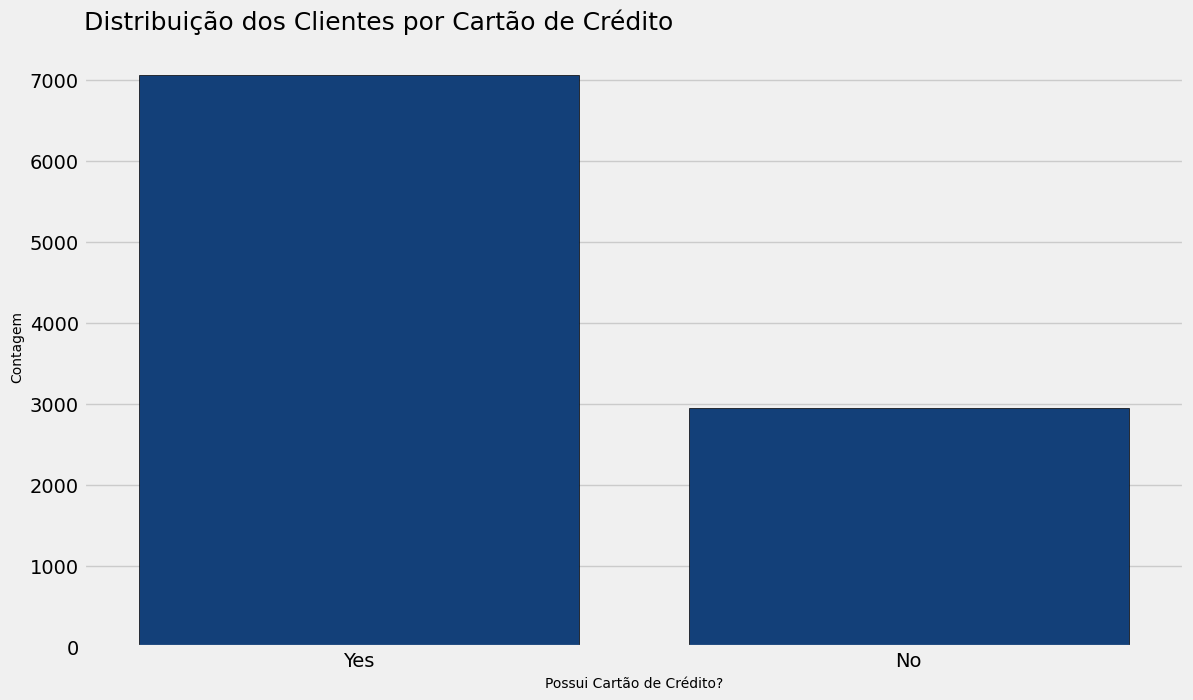

In [329]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(ccard, x = 'credit_card', y = 'count', edgecolor = 'black', linewidth = 0.5)
ax.set_title("Distribuição dos Clientes por Cartão de Crédito", fontsize = 18, pad = 12, loc = "left")
ax.set_xlabel("Possui Cartão de Crédito?", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

#### Sobre o Cartão de Crédito

Cerca de 70% dos clientes contam com serviço de cartão de crédito.

## 3.3. Quem esta abandonando os serviços do Banco ABC?

Vou separar os clientes que estão em ponto de churn em um outro dataframe. Vamos considerar os valores de 1 para sim, e 0 não na coluna de churn.

In [228]:
churn = df[df['churn'] == 1].copy()
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


### Por país

In [230]:
c_country = churn.groupby('country')['churn'].count().reset_index()
c_country.rename(columns = {'churn': 'count'}, inplace = True)
c_country['proportion'] = ((c_country['count'] / c_country['count'].sum()) * 100).round(2)
c_country

,country,count,proportion
0,France,810,39.76
1,Germany,814,39.96
2,Spain,413,20.27


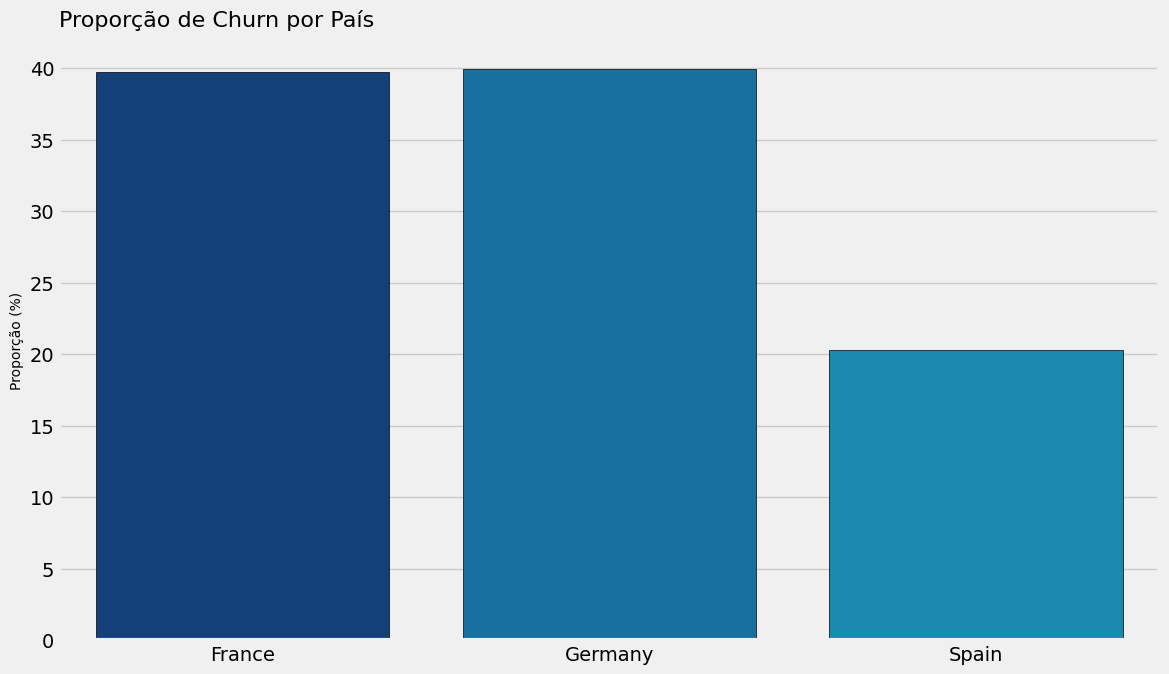

In [327]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(c_country, x = 'country', y = 'proportion', palette = my_palette, edgecolor = 'black', linewidth = 0.5)
ax.set_title("Proporção de Churn por País", loc = "left", fontsize = 16, pad = 10)
ax.set_xlabel("")
ax.set_ylabel("Proporção (%)", fontsize = 10 )
plt.show()

#### Sobre o País de Residência

Apesar de conter apenas 25% da base de clientes a Alemanha conta com aproximadamente 40% dos clientes que estão em ponto de deixar os serviços do Banco ABC, é necessário investigar o que está acontecendo na prestação de serviços nas agências alemãs. França e Espanha mostra um padrão "normal" de acordo com a quantidade de contratantes em cada país mas precisam também de ações contudentes para diminuir o churn.

### Por Gênero

In [234]:
c_gender = churn['gender'].value_counts().reset_index()
c_gender['proportion'] = ((c_gender['count'] / c_gender['count'].sum()) * 100).round(2)
c_gender

,gender,count,proportion
0,Female,1139,55.92
1,Male,898,44.08


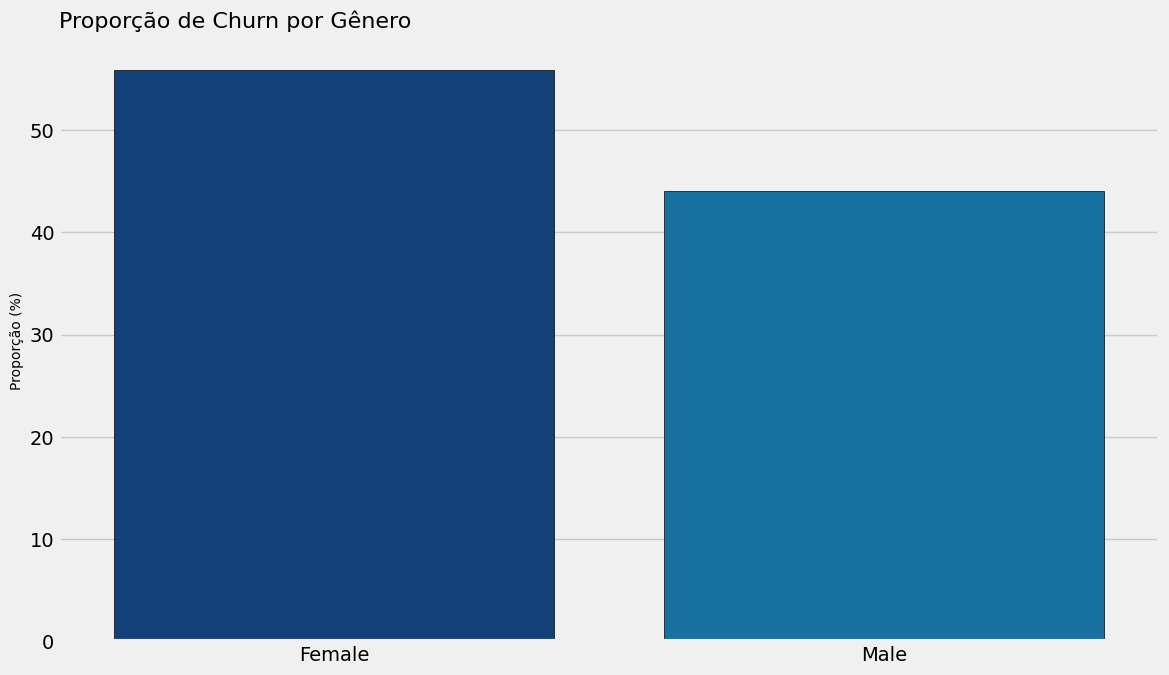

In [325]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(c_gender, x = 'gender', y = 'proportion', palette = my_palette, edgecolor = 'black', linewidth = 0.5)
ax.set_title("Proporção de Churn por Gênero", loc = "left", fontsize = 16, pad = 10)
ax.set_xlabel("")
ax.set_ylabel("Proporção (%)", fontsize = 10 )
plt.show()

#### Sobre o Gênero

Apesar de homens serem a maioria na base de clientes (54%), mulheres são quase 56% dos casos de churn, vejo a necessidade de rever a qualidade do atendimento ao público feminino. 

### Por Idade

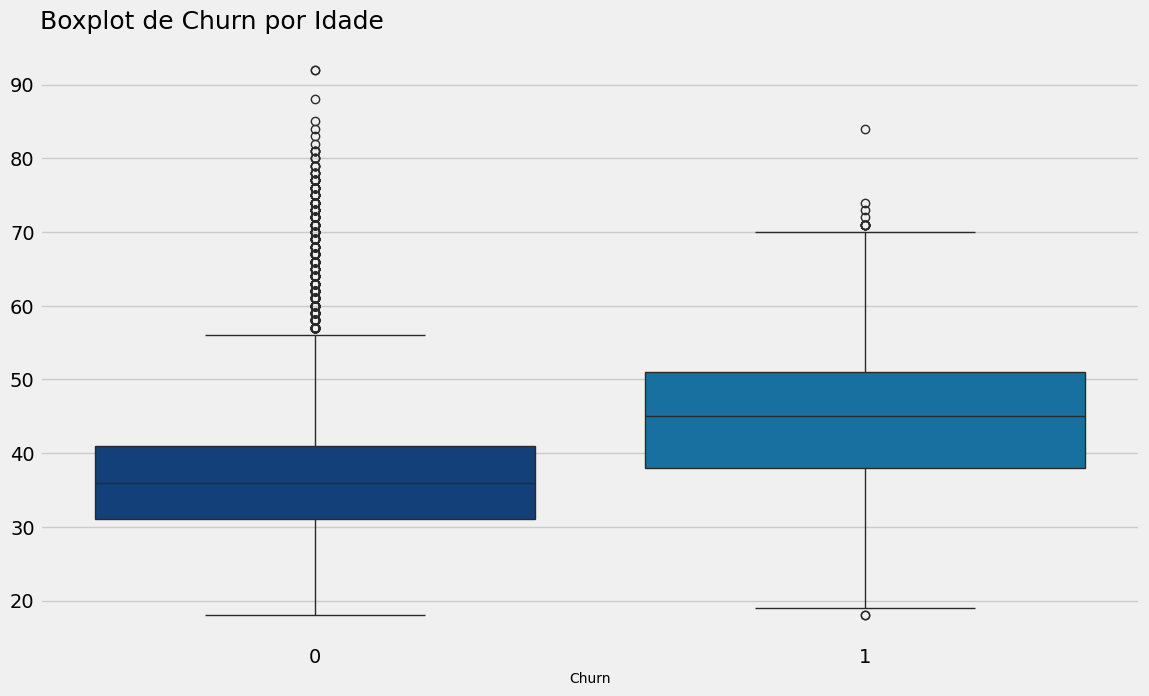

In [323]:
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'churn', y = 'age', palette = my_palette)
ax.set_title("Boxplot de Churn por Idade", loc = 'left', fontsize = 18, pad = 10)
ax.set_xlabel("Churn", fontsize = 10)
ax.set_ylabel("")
plt.show()

#### Sobre a Idade

Os clientes em ponto de churn tem idade mais avançada, estão entre 40 e 50 anos de idade. Isso demonstra a necessidade também de melhora de atendimento.

### Por Score de Crédito

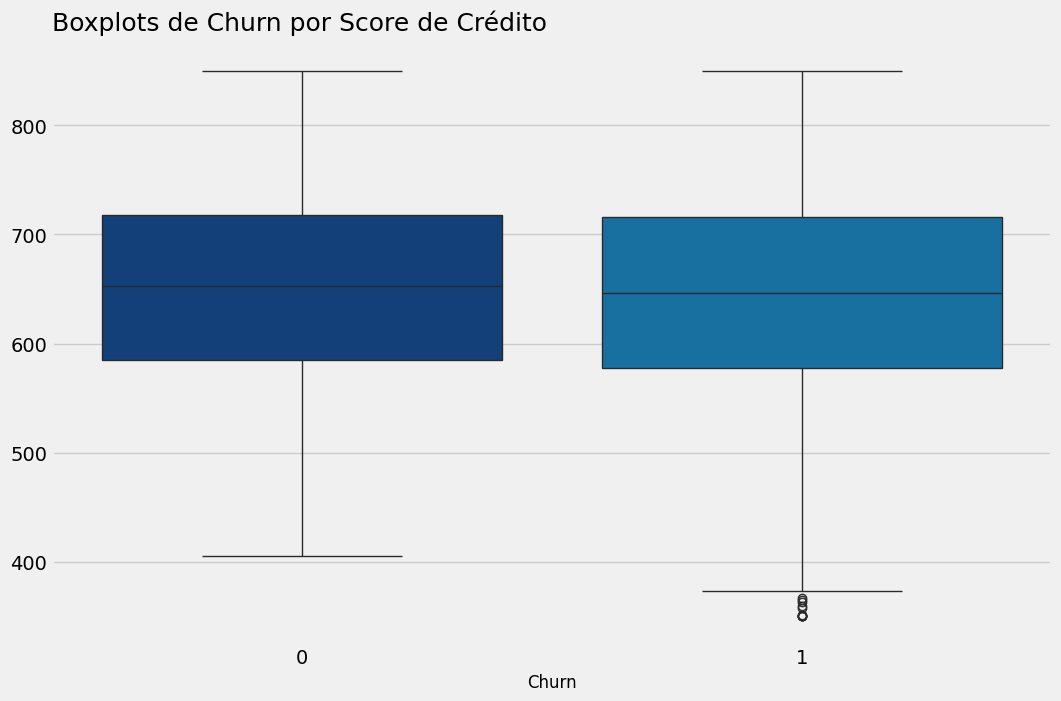

In [241]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'churn', y = 'credit_score', palette = my_palette)
ax.set_title("Boxplots de Churn por Score de Crédito", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("Churn", fontsize = 12)
ax.set_ylabel("")
plt.show()

#### Sobre o Score de Crédito 

Os clientes que estão em ponto de churn tem um bom score de crédito.

### Por Tempo de Relacionamento

In [244]:
c_tenure = churn.groupby('tenure')['churn'].count().reset_index()
c_tenure.rename(columns = {'churn': 'count'}, inplace = True)
c_tenure['proportion'] = ((c_tenure['count'] / c_tenure['count'].sum()) * 100).round(2)
c_tenure

,tenure,count,proportion
0,0,95,4.66
1,1,232,11.39
2,2,201,9.87
3,3,213,10.46
4,4,203,9.97
5,5,209,10.26
6,6,196,9.62
7,7,177,8.69
8,8,197,9.67
9,9,213,10.46


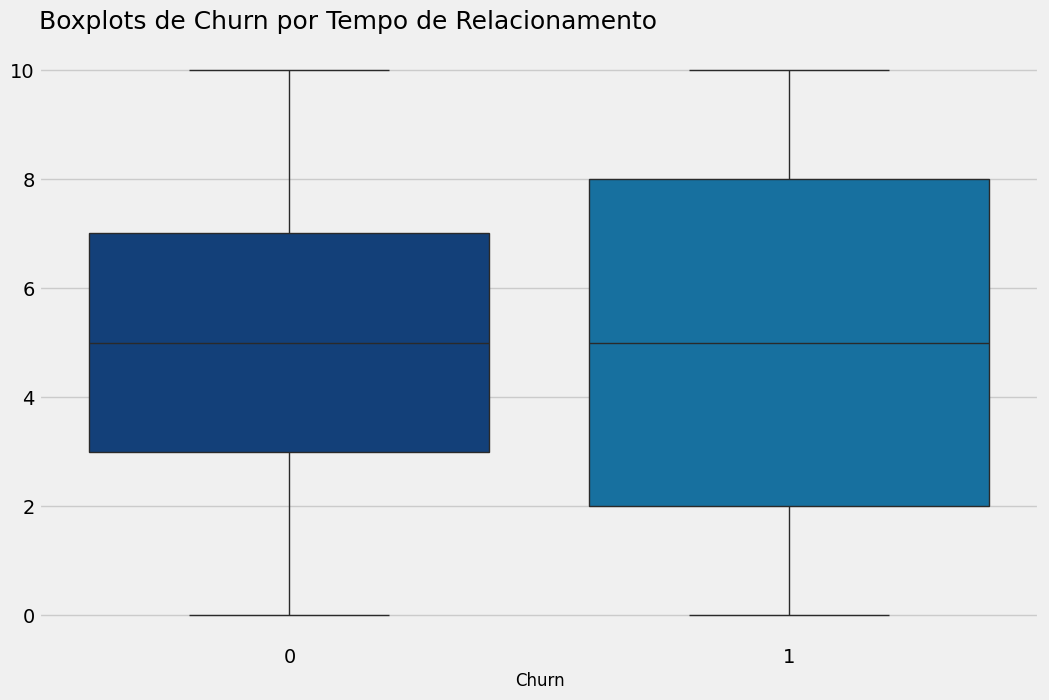

In [245]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'churn', y = 'tenure', palette = my_palette)
ax.set_title("Boxplots de Churn por Tempo de Relacionamento", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("Churn", fontsize = 12)
ax.set_ylabel("")
plt.show()

#### Sobre o Tempo de Relacionamento

Os clientes em ponto de churn estão tem entre 2 e 8 anos de relacionamento com o Banco ABC. Um ponto especial de atenção é o terceiro e quinto ano de relação.

### Por Balanço

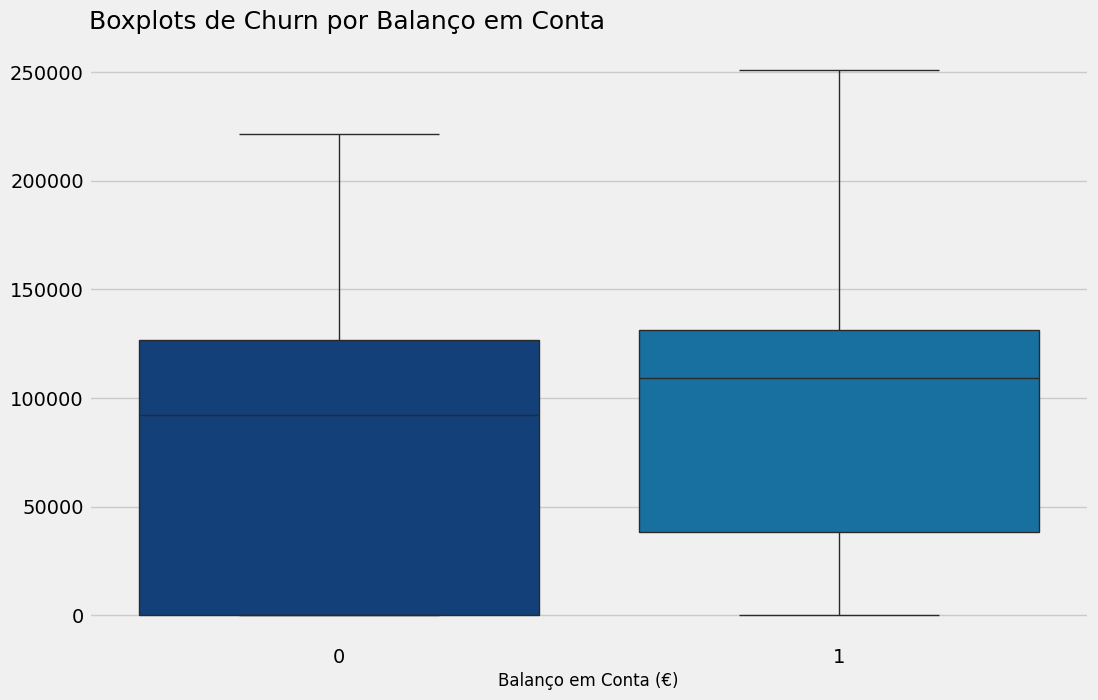

In [248]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'churn', y = 'balance', palette = my_palette)
ax.set_title("Boxplots de Churn por Balanço em Conta", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("Balanço em Conta (€)", fontsize = 12)
ax.set_ylabel("")
plt.show()

Vamos remover a influência dos clientes com conta zerada.

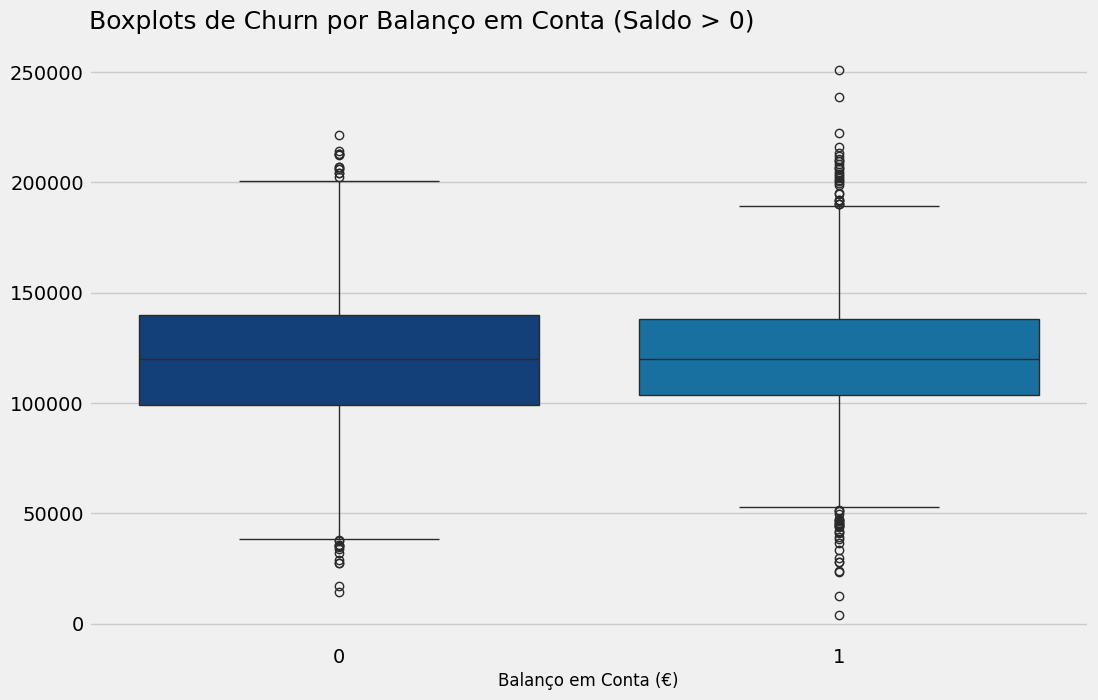

In [250]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(pos_balance, x = 'churn', y = 'balance', palette = my_palette)
ax.set_title("Boxplots de Churn por Balanço em Conta (Saldo > 0)", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("Balanço em Conta (€)", fontsize = 12)
ax.set_ylabel("")
plt.show()

Entre os clientes com balanço positivo, os que estão em ponto de churn tem um bom saldo em conta. 

In [252]:
zerob = balance_zero.groupby("churn")['balance'].count().reset_index()
zerob['churn'] = zerob['churn'].apply(lambda i: "Yes" if i == 1 else "No")
zerob['proportion'] = ((zerob['balance'] / zerob['balance'].sum()) * 100).round(2)
zerob.rename(columns = {'balance': 'balance'}, inplace = True)
zerob

,churn,balance,proportion
0,No,3117,86.18
1,Yes,500,13.82


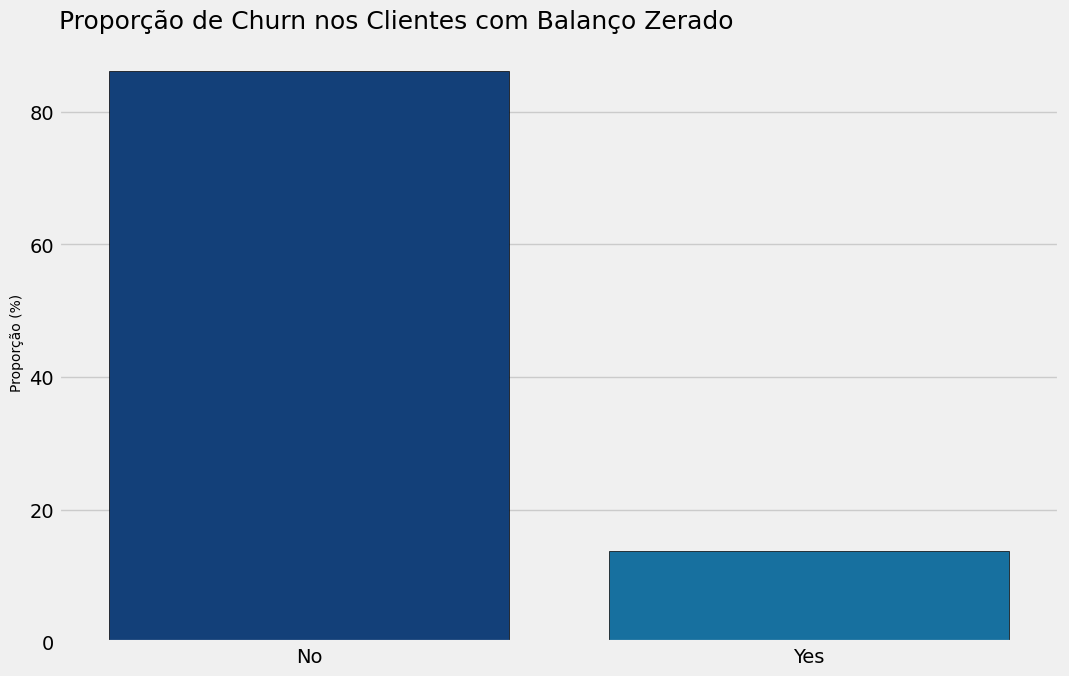

In [253]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(zerob, x = 'churn', y = 'proportion', palette = my_palette, edgecolor = 'black', linewidth = 0.5)
ax.set_title("Proporção de Churn nos Clientes com Balanço Zerado", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("")
ax.set_ylabel("Proporção (%)", fontsize = 10)
plt.show()

Já entre os clientes com saldo zerado 86% não estão em ponto de churn.

### Por Produtos Contratados

In [256]:
c_products = churn['products_number'].value_counts().reset_index()
c_products['proportion'] = ((c_products['count'] / c_products['count'].sum()) * 100).round(2)
c_products

,products_number,count,proportion
0,1,1409,69.17
1,2,348,17.08
2,3,220,10.80
3,4,60,2.95


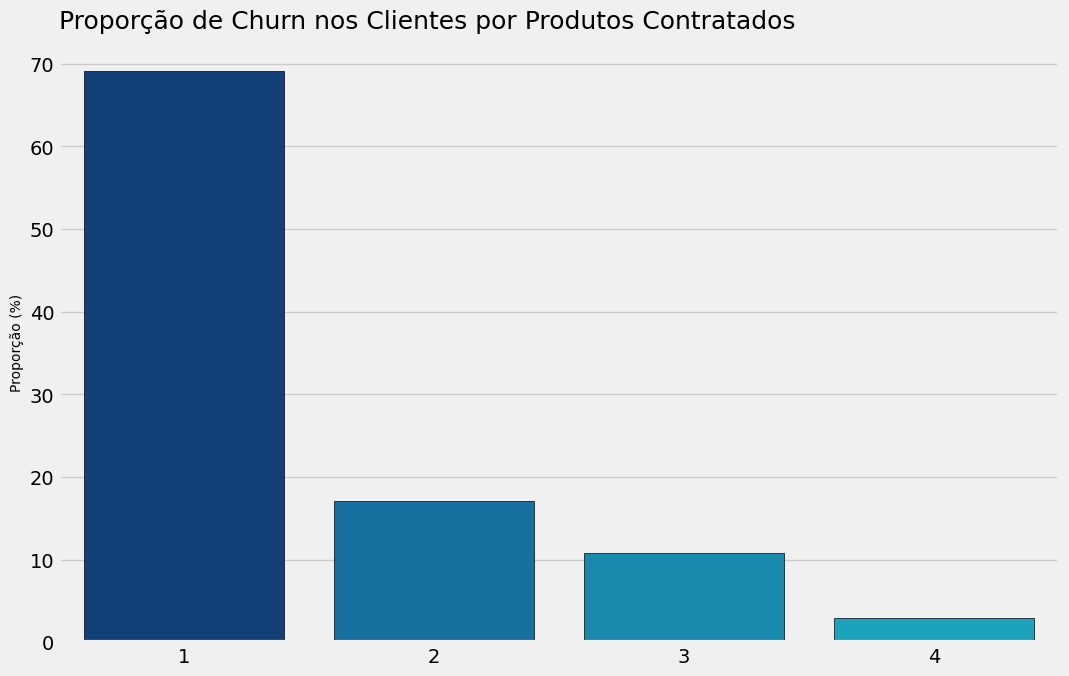

In [257]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(c_products, x = 'products_number', y = 'proportion', palette = my_palette, edgecolor = 'black', linewidth = 0.5)
ax.set_title("Proporção de Churn nos Clientes por Produtos Contratados", loc = "left", fontsize = 18, pad = 10)
ax.set_xlabel("")
ax.set_ylabel("Proporção (%)", fontsize = 10)
plt.show()

#### Sobre os Produtos Contratados

Cerca de 70% dos clientes em ponto de churn tem apenas um produto contratado, acredito que o cartão de crédito. 

In [259]:
df.groupby(['products_number', 'churn'])["credit_score"].mean().reset_index()

,products_number,churn,credit_score
0,1,0,650.426395
1,1,1,645.716111
2,2,0,652.892032
3,2,1,643.614943
4,3,0,670.043478
5,3,1,643.518182
6,4,1,653.583333


A média de Score de Crédito para cada faixa de produtos contratados é semelhante. Acredito que a frustração por não conseguir outros produtos pode ser uma razão. 

### A matriz de correlação

Antes de prosseguir para a matriz de correlação vamos fazer alguns tratamentos nos dados.

In [263]:
# Transformação de gender em booleano

df_corr  = df.copy()
df_corr['gender'] = df_corr['gender'].apply(lambda i: 1 if i == "Male" else 0)
df_corr.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [264]:
df_dummies = pd.get_dummies(df_corr['country'], dtype = int)
df_dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [265]:
df_corr = pd.concat([df_corr.drop(columns = 'country', axis = 1), df_dummies], axis = 1)
df_corr.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [266]:
corr = df_corr.drop(columns = 'customer_id', axis = 1).corr()
corr

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
credit_score,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685
tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
products_number,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
credit_card,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
active_member,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
estimated_salary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
churn,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


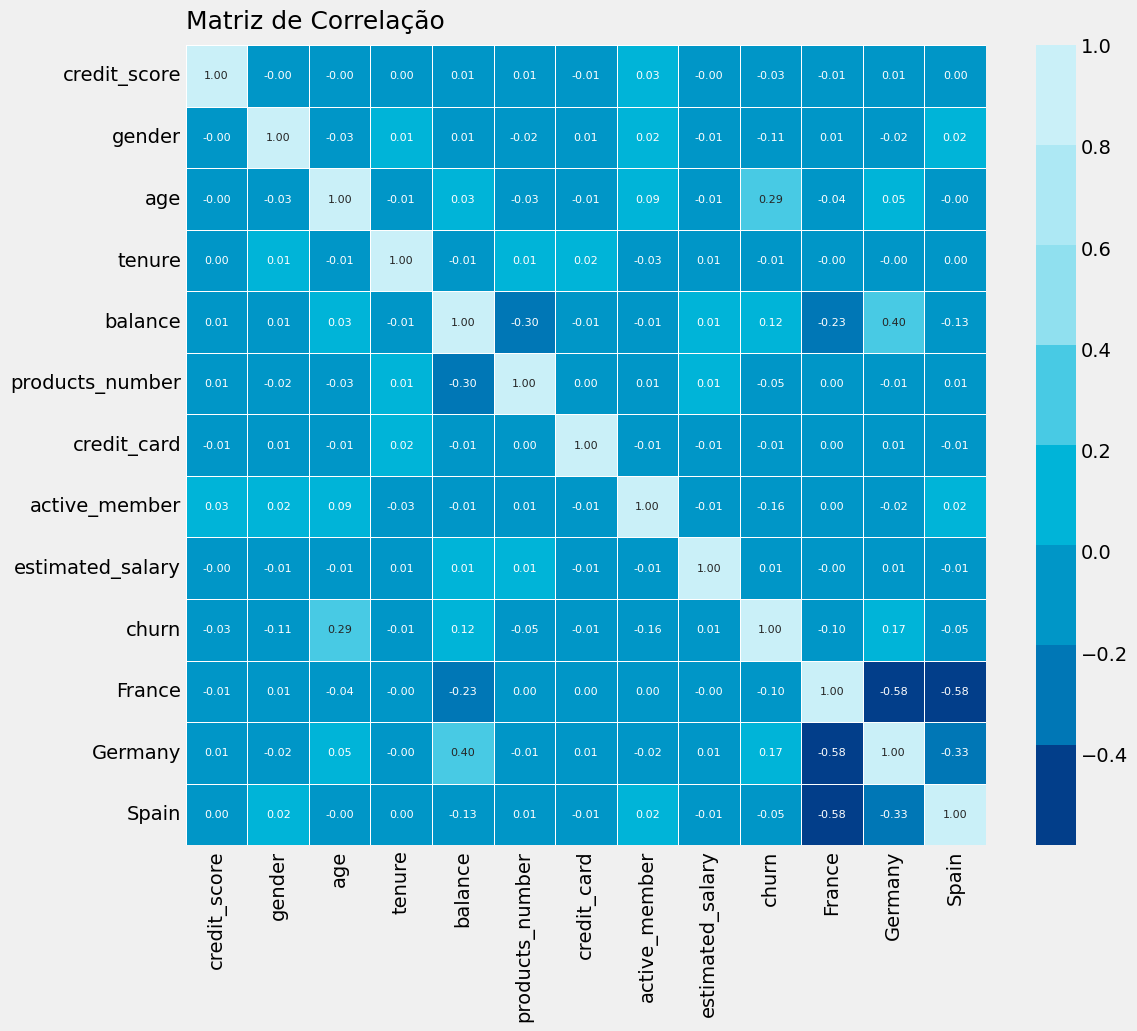

In [267]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_axes([0, 0, 1, 1])

sns.heatmap(corr, annot = True, annot_kws={"size": 8}, fmt = '.2f', square = True, cmap = my_palette, linecolor = 'white', linewidth = 0.5)
ax.set_title('Matriz de Correlação', loc = 'left', fontsize = 18, pad = 12)
plt.show()

# 4. Conclusão

No setor bancário medir a taxa de perda de clientes, também é medir a saúde do negócio. Bancos dependem da movimentação financeira constante e da confiança de seus clientes, com tantas opções e facilidades de abertura de contas existem pequenos detalhes como uma instabilidade no aplicativo do banco ou demora em um atendimento, levam pessoas a buscarem outras instituições. Com a digitalização cada vez maior do mercado financeiro, o surgimento das fintechs e outras mudanças, algumas pessoas não necessariamente irão conseguir acompanhar este ritmo.

![img](https://images.unsplash.com/photo-1509470475192-4516c145f8a1?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

### Alguns insights

- Os  clientes de idade avançada, com maior saldo em conta e mais tempo de relacionamento estão entre aqueles que mais estão abandonando os serviços do Banco ABC, o fator idade é o mais importante e portando é necessário buscar melhorar o atendimento aos mais velhos;
- Mulheres são a maioria entre estes clientes então melhorar o atendimento a esse público também é de suma importância;
- É preciso também buscar as razões para a taxa ser tão alta entre os alemães, buscar entender se fatores culturais na forma de atendimento e prestação de serviços é onde o Banco ABC está falhando;
- Acredito que o setor de marketing e gestão de relacionamento deve procurar meios de incentivar clientes com saldo em conta zerado a trazerem seu dinheiro para o Banco ABC;
- A forma como os salários são estimados e a atividade é determinada deve ser melhorada para análises futuras.